In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from exnn import GAMNet

In [2]:
def data_generator1(datanum, testnum=10000, noise_sigma=1, rand_seed=0):
    
    corr = 0.5
    np.random.seed(rand_seed)
    proj_matrix = np.zeros((10, 4))
    proj_matrix[:7, 0] = np.array([1,0,0,0,0,0,0])
    proj_matrix[:7, 1] = np.array([0,1,0,0,0,0,0])
    proj_matrix[:7, 2] = np.array([0,0,0.5,0.5,0,0,0])
    proj_matrix[:7, 3] = np.array([0,0,0,0,0.2,0.3,0.5])
    u = np.random.uniform(-1, 1, [datanum + testnum, 1])
    t = np.sqrt(corr / (1 - corr))
    x = np.zeros((datanum + testnum, 10))
    for i in range(10):
        x[:, i:i + 1] = (np.random.uniform(-1, 1, [datanum + testnum, 1]) + t * u) / (1 + t)

    y = np.reshape(2 * np.dot(x, proj_matrix[:, 0]) + 0.2 * np.exp(-4 * np.dot(x, proj_matrix[:, 1])) + \
                   3 * (np.dot(x, proj_matrix[:, 2]))**2 + 2.5 * np.sin(np.pi * np.dot(x, proj_matrix[:, 3])), [-1, 1]) + \
              noise_sigma * np.random.normal(0, 1, [datanum + testnum, 1])
    
    task_type = "Regression"
    meta_info = {"X1":{"type":"continuous"},
             "X2":{"type":"continuous"},
             "X3":{"type":"continuous"},
             "X4":{"type":"continuous"},
             "X5":{"type":"continuous"},
             "X6":{"type":"continuous"},
             "X7":{"type":"continuous"},
             "X8":{"type":"continuous"},
             "X9":{"type":"continuous"},
             "X10":{"type":"continuous"},
             "Y":{"type":"target"}}
    for i, (key, item) in enumerate(meta_info.items()):
        if item['type'] == "target":
            sy = MinMaxScaler((-1, 1))
            y = sy.fit_transform(y)
            meta_info[key]["scaler"] = sy
        elif item['type'] == "categorical":
            enc = OrdinalEncoder()
            enc.fit(x[:,[i]])
            ordinal_feature = enc.transform(x[:,[i]])
            x[:,[i]] = ordinal_feature
            meta_info[key]["values"] = enc.categories_[0].tolist()
        else:
            sx = MinMaxScaler((-1, 1))
            x[:,[i]] = sx.fit_transform(x[:,[i]])
            meta_info[key]["scaler"] = sx

    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=testnum, random_state=rand_seed)
    return train_x, test_x, train_y, test_y, task_type, meta_info

train_x, test_x, train_y, test_y, task_type, meta_info = data_generator1(datanum=10000, testnum=10000, noise_sigma=1, rand_seed=0)

Initial training.


W1209 18:35:29.541705 140304144590656 deprecation.py:323] From /home/r7user1/anaconda2_local/envs/tf2/lib/python3.6/site-packages/tensorflow_core/python/autograph/impl/api.py:330: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.


Training epoch: 1, train loss: 2.64600, val loss: 2.55468
Training epoch: 2, train loss: 1.56205, val loss: 1.51959
Training epoch: 3, train loss: 0.90727, val loss: 0.89689
Training epoch: 4, train loss: 0.52213, val loss: 0.51681
Training epoch: 5, train loss: 0.50752, val loss: 0.50266
Training epoch: 6, train loss: 0.49964, val loss: 0.49563
Training epoch: 7, train loss: 0.49207, val loss: 0.48888
Training epoch: 8, train loss: 0.48383, val loss: 0.48039
Training epoch: 9, train loss: 0.47556, val loss: 0.47327
Training epoch: 10, train loss: 0.46734, val loss: 0.46487
Training epoch: 11, train loss: 0.45869, val loss: 0.45635
Training epoch: 12, train loss: 0.45070, val loss: 0.44833
Training epoch: 13, train loss: 0.44287, val loss: 0.44098
Training epoch: 14, train loss: 0.43490, val loss: 0.43333
Training epoch: 15, train loss: 0.42679, val loss: 0.42516
Training epoch: 16, train loss: 0.41891, val loss: 0.41811
Training epoch: 17, train loss: 0.41078, val loss: 0.40979
Traini

Training epoch: 143, train loss: 0.01877, val loss: 0.01952
Training epoch: 144, train loss: 0.01871, val loss: 0.01946
Training epoch: 145, train loss: 0.01863, val loss: 0.01940
Training epoch: 146, train loss: 0.01875, val loss: 0.01945
Training epoch: 147, train loss: 0.01853, val loss: 0.01930
Training epoch: 148, train loss: 0.01847, val loss: 0.01923
Training epoch: 149, train loss: 0.01841, val loss: 0.01917
Training epoch: 150, train loss: 0.01840, val loss: 0.01917
Training epoch: 151, train loss: 0.01834, val loss: 0.01913
Training epoch: 152, train loss: 0.01829, val loss: 0.01903
Training epoch: 153, train loss: 0.01825, val loss: 0.01901
Training epoch: 154, train loss: 0.01822, val loss: 0.01901
Training epoch: 155, train loss: 0.01834, val loss: 0.01916
Training epoch: 156, train loss: 0.01816, val loss: 0.01893
Training epoch: 157, train loss: 0.01813, val loss: 0.01888
Training epoch: 158, train loss: 0.01821, val loss: 0.01901
Training epoch: 159, train loss: 0.01814

Training epoch: 281, train loss: 0.01754, val loss: 0.01827
Training epoch: 282, train loss: 0.01762, val loss: 0.01834
Training epoch: 283, train loss: 0.01752, val loss: 0.01827
Training epoch: 284, train loss: 0.01763, val loss: 0.01837
Training epoch: 285, train loss: 0.01752, val loss: 0.01826
Training epoch: 286, train loss: 0.01752, val loss: 0.01824
Training epoch: 287, train loss: 0.01754, val loss: 0.01828
Training epoch: 288, train loss: 0.01754, val loss: 0.01826
Training epoch: 289, train loss: 0.01756, val loss: 0.01830
Training epoch: 290, train loss: 0.01754, val loss: 0.01830
Training epoch: 291, train loss: 0.01754, val loss: 0.01826
Training epoch: 292, train loss: 0.01761, val loss: 0.01835
Training epoch: 293, train loss: 0.01751, val loss: 0.01824
Training epoch: 294, train loss: 0.01754, val loss: 0.01827
Training epoch: 295, train loss: 0.01751, val loss: 0.01824
Training epoch: 296, train loss: 0.01753, val loss: 0.01825
Training epoch: 297, train loss: 0.01751

Training epoch: 419, train loss: 0.01751, val loss: 0.01823
Training epoch: 420, train loss: 0.01746, val loss: 0.01818
Training epoch: 421, train loss: 0.01744, val loss: 0.01819
Training epoch: 422, train loss: 0.01760, val loss: 0.01831
Training epoch: 423, train loss: 0.01753, val loss: 0.01824
Training epoch: 424, train loss: 0.01744, val loss: 0.01816
Training epoch: 425, train loss: 0.01743, val loss: 0.01816
Training epoch: 426, train loss: 0.01748, val loss: 0.01819
Training epoch: 427, train loss: 0.01744, val loss: 0.01813
Training epoch: 428, train loss: 0.01742, val loss: 0.01816
Training epoch: 429, train loss: 0.01743, val loss: 0.01816
Training epoch: 430, train loss: 0.01745, val loss: 0.01815
Training epoch: 431, train loss: 0.01746, val loss: 0.01815
Training epoch: 432, train loss: 0.01743, val loss: 0.01817
Training epoch: 433, train loss: 0.01742, val loss: 0.01812
Training epoch: 434, train loss: 0.01753, val loss: 0.01827
Training epoch: 435, train loss: 0.01741

Training epoch: 557, train loss: 0.01736, val loss: 0.01806
Training epoch: 558, train loss: 0.01733, val loss: 0.01805
Training epoch: 559, train loss: 0.01733, val loss: 0.01801
Training epoch: 560, train loss: 0.01733, val loss: 0.01804
Training epoch: 561, train loss: 0.01736, val loss: 0.01807
Training epoch: 562, train loss: 0.01735, val loss: 0.01804
Training epoch: 563, train loss: 0.01734, val loss: 0.01805
Training epoch: 564, train loss: 0.01733, val loss: 0.01804
Training epoch: 565, train loss: 0.01732, val loss: 0.01801
Training epoch: 566, train loss: 0.01737, val loss: 0.01808
Training epoch: 567, train loss: 0.01746, val loss: 0.01818
Training epoch: 568, train loss: 0.01734, val loss: 0.01802
Training epoch: 569, train loss: 0.01742, val loss: 0.01812
Training epoch: 570, train loss: 0.01733, val loss: 0.01806
Training epoch: 571, train loss: 0.01731, val loss: 0.01802
Training epoch: 572, train loss: 0.01732, val loss: 0.01801
Training epoch: 573, train loss: 0.01743

Training epoch: 698, train loss: 0.01720, val loss: 0.01789
Training epoch: 699, train loss: 0.01720, val loss: 0.01788
Training epoch: 700, train loss: 0.01718, val loss: 0.01787
Training epoch: 701, train loss: 0.01720, val loss: 0.01787
Training epoch: 702, train loss: 0.01720, val loss: 0.01787
Training epoch: 703, train loss: 0.01731, val loss: 0.01798
Training epoch: 704, train loss: 0.01720, val loss: 0.01786
Training epoch: 705, train loss: 0.01728, val loss: 0.01793
Training epoch: 706, train loss: 0.01723, val loss: 0.01795
Training epoch: 707, train loss: 0.01720, val loss: 0.01786
Training epoch: 708, train loss: 0.01722, val loss: 0.01789
Training epoch: 709, train loss: 0.01717, val loss: 0.01783
Training epoch: 710, train loss: 0.01717, val loss: 0.01785
Training epoch: 711, train loss: 0.01725, val loss: 0.01791
Training epoch: 712, train loss: 0.01721, val loss: 0.01790
Training epoch: 713, train loss: 0.01716, val loss: 0.01785
Training epoch: 714, train loss: 0.01717

Training epoch: 839, train loss: 0.01709, val loss: 0.01770
Training epoch: 840, train loss: 0.01707, val loss: 0.01766
Training epoch: 841, train loss: 0.01717, val loss: 0.01779
Training epoch: 842, train loss: 0.01716, val loss: 0.01776
Training epoch: 843, train loss: 0.01709, val loss: 0.01769
Training epoch: 844, train loss: 0.01712, val loss: 0.01770
Training epoch: 845, train loss: 0.01726, val loss: 0.01792
Training epoch: 846, train loss: 0.01710, val loss: 0.01769
Training epoch: 847, train loss: 0.01723, val loss: 0.01782
Training epoch: 848, train loss: 0.01710, val loss: 0.01772
Training epoch: 849, train loss: 0.01720, val loss: 0.01780
Training epoch: 850, train loss: 0.01713, val loss: 0.01774
Training epoch: 851, train loss: 0.01712, val loss: 0.01775
Training epoch: 852, train loss: 0.01715, val loss: 0.01776
Training epoch: 853, train loss: 0.01708, val loss: 0.01766
Training epoch: 854, train loss: 0.01708, val loss: 0.01772
Training epoch: 855, train loss: 0.01710

Training epoch: 976, train loss: 0.01713, val loss: 0.01774
Training epoch: 977, train loss: 0.01708, val loss: 0.01767
Training epoch: 978, train loss: 0.01709, val loss: 0.01771
Training epoch: 979, train loss: 0.01705, val loss: 0.01767
Training epoch: 980, train loss: 0.01705, val loss: 0.01764
Training epoch: 981, train loss: 0.01705, val loss: 0.01764
Training epoch: 982, train loss: 0.01713, val loss: 0.01774
Training epoch: 983, train loss: 0.01711, val loss: 0.01774
Training epoch: 984, train loss: 0.01705, val loss: 0.01766
Training epoch: 985, train loss: 0.01705, val loss: 0.01769
Training epoch: 986, train loss: 0.01707, val loss: 0.01767
Training epoch: 987, train loss: 0.01707, val loss: 0.01769
Training epoch: 988, train loss: 0.01707, val loss: 0.01770
Training epoch: 989, train loss: 0.01705, val loss: 0.01766
Training epoch: 990, train loss: 0.01705, val loss: 0.01767
Training epoch: 991, train loss: 0.01709, val loss: 0.01771
Training epoch: 992, train loss: 0.01706

Training epoch: 1111, train loss: 0.01707, val loss: 0.01771
Training epoch: 1112, train loss: 0.01714, val loss: 0.01776
Training epoch: 1113, train loss: 0.01727, val loss: 0.01788
Training epoch: 1114, train loss: 0.01708, val loss: 0.01771
Training epoch: 1115, train loss: 0.01704, val loss: 0.01764
Training epoch: 1116, train loss: 0.01705, val loss: 0.01766
Training epoch: 1117, train loss: 0.01707, val loss: 0.01768
Training epoch: 1118, train loss: 0.01705, val loss: 0.01767
Training epoch: 1119, train loss: 0.01704, val loss: 0.01769
Training epoch: 1120, train loss: 0.01706, val loss: 0.01766
Training epoch: 1121, train loss: 0.01709, val loss: 0.01768
Training epoch: 1122, train loss: 0.01704, val loss: 0.01766
Training epoch: 1123, train loss: 0.01706, val loss: 0.01769
Training epoch: 1124, train loss: 0.01704, val loss: 0.01766
Training epoch: 1125, train loss: 0.01705, val loss: 0.01768
Training epoch: 1126, train loss: 0.01708, val loss: 0.01768
Training epoch: 1127, tr

Training epoch: 1246, train loss: 0.01702, val loss: 0.01764
Training epoch: 1247, train loss: 0.01703, val loss: 0.01764
Training epoch: 1248, train loss: 0.01703, val loss: 0.01765
Training epoch: 1249, train loss: 0.01705, val loss: 0.01771
Training epoch: 1250, train loss: 0.01703, val loss: 0.01766
Training epoch: 1251, train loss: 0.01711, val loss: 0.01766
Training epoch: 1252, train loss: 0.01703, val loss: 0.01769
Training epoch: 1253, train loss: 0.01705, val loss: 0.01769
Training epoch: 1254, train loss: 0.01708, val loss: 0.01766
Training epoch: 1255, train loss: 0.01709, val loss: 0.01775
Training epoch: 1256, train loss: 0.01705, val loss: 0.01767
Training epoch: 1257, train loss: 0.01704, val loss: 0.01768
Training epoch: 1258, train loss: 0.01704, val loss: 0.01765
Training epoch: 1259, train loss: 0.01702, val loss: 0.01765
Training epoch: 1260, train loss: 0.01705, val loss: 0.01766
Training epoch: 1261, train loss: 0.01705, val loss: 0.01769
Training epoch: 1262, tr

Training epoch: 1382, train loss: 0.01701, val loss: 0.01765
Training epoch: 1383, train loss: 0.01702, val loss: 0.01763
Training epoch: 1384, train loss: 0.01705, val loss: 0.01763
Training epoch: 1385, train loss: 0.01702, val loss: 0.01767
Training epoch: 1386, train loss: 0.01702, val loss: 0.01763
Training epoch: 1387, train loss: 0.01704, val loss: 0.01767
Training epoch: 1388, train loss: 0.01702, val loss: 0.01761
Training epoch: 1389, train loss: 0.01701, val loss: 0.01764
Training epoch: 1390, train loss: 0.01704, val loss: 0.01762
Training epoch: 1391, train loss: 0.01704, val loss: 0.01770
Training epoch: 1392, train loss: 0.01705, val loss: 0.01766
Training epoch: 1393, train loss: 0.01702, val loss: 0.01767
Training epoch: 1394, train loss: 0.01703, val loss: 0.01765
Training epoch: 1395, train loss: 0.01701, val loss: 0.01762
Training epoch: 1396, train loss: 0.01706, val loss: 0.01769
Training epoch: 1397, train loss: 0.01705, val loss: 0.01769
Training epoch: 1398, tr

Training epoch: 1518, train loss: 0.01701, val loss: 0.01762
Training epoch: 1519, train loss: 0.01703, val loss: 0.01763
Training epoch: 1520, train loss: 0.01701, val loss: 0.01766
Training epoch: 1521, train loss: 0.01704, val loss: 0.01765
Training epoch: 1522, train loss: 0.01703, val loss: 0.01768
Training epoch: 1523, train loss: 0.01702, val loss: 0.01764
Training epoch: 1524, train loss: 0.01701, val loss: 0.01763
Training epoch: 1525, train loss: 0.01706, val loss: 0.01770
Training epoch: 1526, train loss: 0.01705, val loss: 0.01766
Training epoch: 1527, train loss: 0.01702, val loss: 0.01764
Training epoch: 1528, train loss: 0.01701, val loss: 0.01766
Training epoch: 1529, train loss: 0.01708, val loss: 0.01765
Training epoch: 1530, train loss: 0.01713, val loss: 0.01775
Training epoch: 1531, train loss: 0.01710, val loss: 0.01773
Training epoch: 1532, train loss: 0.01700, val loss: 0.01763
Training epoch: 1533, train loss: 0.01702, val loss: 0.01765
Training epoch: 1534, tr

Training epoch: 1654, train loss: 0.01708, val loss: 0.01768
Training epoch: 1655, train loss: 0.01703, val loss: 0.01766
Training epoch: 1656, train loss: 0.01699, val loss: 0.01759
Training epoch: 1657, train loss: 0.01700, val loss: 0.01763
Training epoch: 1658, train loss: 0.01699, val loss: 0.01766
Training epoch: 1659, train loss: 0.01700, val loss: 0.01758
Training epoch: 1660, train loss: 0.01699, val loss: 0.01759
Training epoch: 1661, train loss: 0.01700, val loss: 0.01760
Training epoch: 1662, train loss: 0.01711, val loss: 0.01776
Training epoch: 1663, train loss: 0.01719, val loss: 0.01779
Training epoch: 1664, train loss: 0.01708, val loss: 0.01773
Training epoch: 1665, train loss: 0.01708, val loss: 0.01766
Training epoch: 1666, train loss: 0.01706, val loss: 0.01769
Training epoch: 1667, train loss: 0.01700, val loss: 0.01760
Training epoch: 1668, train loss: 0.01700, val loss: 0.01761
Training epoch: 1669, train loss: 0.01699, val loss: 0.01758
Training epoch: 1670, tr

Training epoch: 1791, train loss: 0.01698, val loss: 0.01758
Training epoch: 1792, train loss: 0.01703, val loss: 0.01759
Training epoch: 1793, train loss: 0.01701, val loss: 0.01762
Training epoch: 1794, train loss: 0.01700, val loss: 0.01761
Training epoch: 1795, train loss: 0.01698, val loss: 0.01756
Training epoch: 1796, train loss: 0.01698, val loss: 0.01758
Training epoch: 1797, train loss: 0.01698, val loss: 0.01761
Training epoch: 1798, train loss: 0.01699, val loss: 0.01758
Training epoch: 1799, train loss: 0.01701, val loss: 0.01763
Training epoch: 1800, train loss: 0.01705, val loss: 0.01765
Training epoch: 1801, train loss: 0.01704, val loss: 0.01767
Training epoch: 1802, train loss: 0.01699, val loss: 0.01758
Training epoch: 1803, train loss: 0.01705, val loss: 0.01763
Training epoch: 1804, train loss: 0.01703, val loss: 0.01762
Training epoch: 1805, train loss: 0.01700, val loss: 0.01759
Training epoch: 1806, train loss: 0.01699, val loss: 0.01759
Training epoch: 1807, tr

Training epoch: 1927, train loss: 0.01701, val loss: 0.01760
Training epoch: 1928, train loss: 0.01699, val loss: 0.01760
Training epoch: 1929, train loss: 0.01698, val loss: 0.01760
Training epoch: 1930, train loss: 0.01700, val loss: 0.01758
Training epoch: 1931, train loss: 0.01697, val loss: 0.01760
Training epoch: 1932, train loss: 0.01700, val loss: 0.01762
Training epoch: 1933, train loss: 0.01698, val loss: 0.01759
Training epoch: 1934, train loss: 0.01699, val loss: 0.01760
Training epoch: 1935, train loss: 0.01701, val loss: 0.01759
Training epoch: 1936, train loss: 0.01700, val loss: 0.01764
Training epoch: 1937, train loss: 0.01698, val loss: 0.01759
Training epoch: 1938, train loss: 0.01698, val loss: 0.01760
Training epoch: 1939, train loss: 0.01698, val loss: 0.01762
Training epoch: 1940, train loss: 0.01700, val loss: 0.01762
Training epoch: 1941, train loss: 0.01698, val loss: 0.01759
Training epoch: 1942, train loss: 0.01699, val loss: 0.01761
Training epoch: 1943, tr

Training epoch: 2063, train loss: 0.01698, val loss: 0.01759
Training epoch: 2064, train loss: 0.01697, val loss: 0.01760
Training epoch: 2065, train loss: 0.01697, val loss: 0.01757
Training epoch: 2066, train loss: 0.01698, val loss: 0.01760
Training epoch: 2067, train loss: 0.01698, val loss: 0.01762
Training epoch: 2068, train loss: 0.01697, val loss: 0.01760
Training epoch: 2069, train loss: 0.01700, val loss: 0.01755
Training epoch: 2070, train loss: 0.01700, val loss: 0.01763
Training epoch: 2071, train loss: 0.01698, val loss: 0.01760
Training epoch: 2072, train loss: 0.01698, val loss: 0.01761
Training epoch: 2073, train loss: 0.01700, val loss: 0.01758
Training epoch: 2074, train loss: 0.01700, val loss: 0.01763
Training epoch: 2075, train loss: 0.01698, val loss: 0.01759
Training epoch: 2076, train loss: 0.01700, val loss: 0.01760
Training epoch: 2077, train loss: 0.01701, val loss: 0.01760
Training epoch: 2078, train loss: 0.01702, val loss: 0.01762
Training epoch: 2079, tr

Training epoch: 2199, train loss: 0.01699, val loss: 0.01764
Training epoch: 2200, train loss: 0.01698, val loss: 0.01755
Training epoch: 2201, train loss: 0.01697, val loss: 0.01760
Training epoch: 2202, train loss: 0.01699, val loss: 0.01759
Training epoch: 2203, train loss: 0.01697, val loss: 0.01758
Training epoch: 2204, train loss: 0.01698, val loss: 0.01760
Training epoch: 2205, train loss: 0.01697, val loss: 0.01756
Training epoch: 2206, train loss: 0.01697, val loss: 0.01758
Training epoch: 2207, train loss: 0.01699, val loss: 0.01758
Training epoch: 2208, train loss: 0.01697, val loss: 0.01758
Training epoch: 2209, train loss: 0.01698, val loss: 0.01760
Training epoch: 2210, train loss: 0.01700, val loss: 0.01761
Training epoch: 2211, train loss: 0.01700, val loss: 0.01759
Training epoch: 2212, train loss: 0.01699, val loss: 0.01759
Training epoch: 2213, train loss: 0.01700, val loss: 0.01761
Training epoch: 2214, train loss: 0.01697, val loss: 0.01754
Training epoch: 2215, tr

Tuning epoch: 20, train loss: 0.01705, val loss: 0.01763
Tuning epoch: 21, train loss: 0.01700, val loss: 0.01758
Tuning epoch: 22, train loss: 0.01701, val loss: 0.01760
Tuning epoch: 23, train loss: 0.01700, val loss: 0.01760
Tuning epoch: 24, train loss: 0.01699, val loss: 0.01758
Tuning epoch: 25, train loss: 0.01700, val loss: 0.01760
Tuning epoch: 26, train loss: 0.01700, val loss: 0.01759
Tuning epoch: 27, train loss: 0.01700, val loss: 0.01757
Tuning epoch: 28, train loss: 0.01700, val loss: 0.01758
Tuning epoch: 29, train loss: 0.01700, val loss: 0.01758
Tuning epoch: 30, train loss: 0.01699, val loss: 0.01761
Tuning epoch: 31, train loss: 0.01701, val loss: 0.01757
Tuning epoch: 32, train loss: 0.01700, val loss: 0.01759
Tuning epoch: 33, train loss: 0.01700, val loss: 0.01757
Tuning epoch: 34, train loss: 0.01699, val loss: 0.01758
Tuning epoch: 35, train loss: 0.01699, val loss: 0.01760
Tuning epoch: 36, train loss: 0.01701, val loss: 0.01761
Tuning epoch: 37, train loss: 0

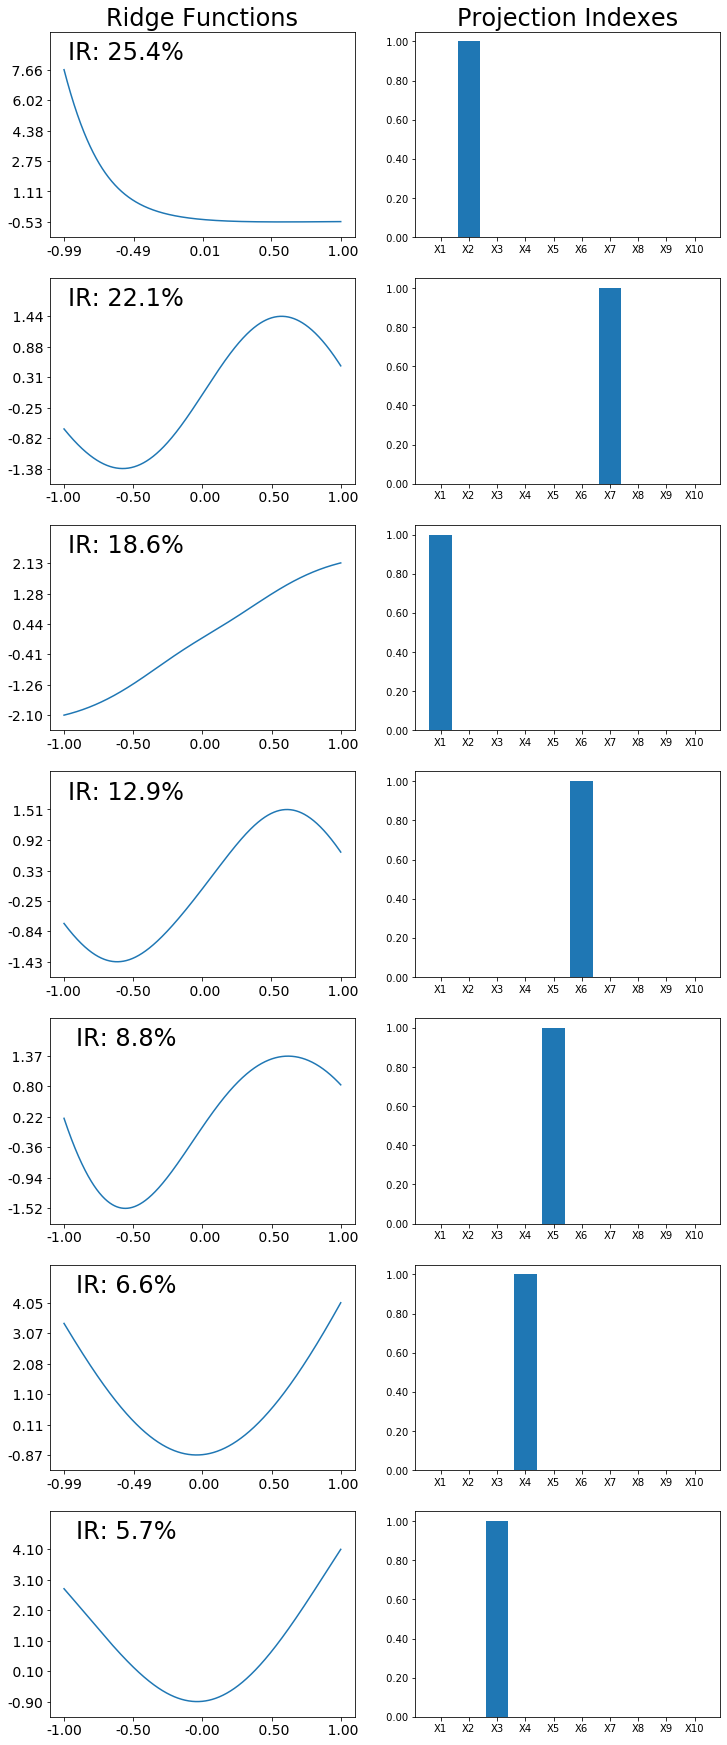

In [3]:
model = GAMNet(meta_info=meta_info,
               subnet_arch=[10, 6],
               task_type=task_type,
               activation_func=tf.tanh,
               batch_size=min(1000, int(train_x.shape[0] * 0.2)),
               training_epochs=10000,
               lr_bp=0.001,
               beta_threshold=0.05,
               tuning_epochs=100,
               l1_subnet=0.001,
               verbose=True,
               val_ratio=0.2,
               early_stop_thres=500)
model.fit(train_x, train_y)
model.visualize("./", "gamnet_demo")

In [4]:
tr_pred = model.predict(model.tr_x) 
val_pred = model.predict(model.val_x) 
pred_test = model.predict(test_x)

mse_stat = np.hstack([np.round(np.mean((meta_info["Y"]["scaler"].inverse_transform(tr_pred) - meta_info["Y"]["scaler"].inverse_transform(model.tr_y))**2),5),\
                             np.round(np.mean((meta_info["Y"]["scaler"].inverse_transform(val_pred) - meta_info["Y"]["scaler"].inverse_transform(model.val_y))**2),5),\
               np.round(np.mean((meta_info["Y"]["scaler"].inverse_transform(pred_test) - meta_info["Y"]["scaler"].inverse_transform(test_y))**2),5)])
print(mse_stat)

[1.12767 1.16634 1.10313]
